In [14]:
%reload_ext autoreload
%autoreload 2

import cartopy
from matplotlib import cm
from matplotlib.colors import BoundaryNorm
import numpy as np
import rioxarray
import util
import xarray as xr

In [11]:
var_type = 'single'
var = 'prec'
level = False
start_date = '2008-06-01'
end_date = '2009-02-28'
agg_by = 'max' # aggregation type 
agg_for = '1D' # aggregate for

In [13]:
da_model, da_era = util.get_model_era_files(var_type=var_type, var=var, level=level,
                                            start_date=start_date, end_date=end_date,)

In [4]:
# regrid
model_proj = util.ModelProj().crs_info_model # crs info for the model
era_proj = 4326 # input esg code for era

da_model, da_era = util.regrid_match(da_model, da_era,
                                     model_proj, era_proj)

In [5]:
# interpolate
rlat, rlon, time = da_model.indexes.values()
da_era = da_era.interp(rlon=rlon, rlat=rlat, method="nearest") # interp to model grid

In [6]:
if var=="prec":
    da_era = da_era*1000 # m to mm
elif var=='t2m':
    da_era = da_era-273.15 # K to C
    da_model = da_model-273.15 # K to C    

In [7]:
da_model_aggr = util.aggregate_file(da_model, agg_by, agg_for)
da_era_aggr = util.aggregate_file(da_era, agg_by, agg_for)

In [32]:
if var == 'prec':
    thrs_era = util.num_days_precip_below_thresh(da_era_aggr, 5)
    thrs_model = util.num_days_precip_below_thresh(da_model_aggr, 5)
    thrs_dif = thrs_model-thrs_era
    thrs_dif.name=var
    
    #thrs_dif.to_netcdf(fr'data/post_processed/threshold_{var}.nc')    
elif var == 't2m':
    thrs_era = util.num_days_temp_above_thresh(da_era_aggr, 32)
    thrs_model = util.num_days_temp_above_thresh(da_model_aggr, 32)
    thrs_dif = thrs_model-thrs_era
    thrs_dif.name=var
    
    #thrs_dif.to_netcdf(fr'data/post_processed/threshold_{var}.nc')    

In [8]:
prec_threshold = xr.open_dataset(fr'data/post_processed/threshold_prec.nc')['prec']
t2m_threshold = xr.open_dataset(fr'data/post_processed/threshold_t2m.nc')['t2m']

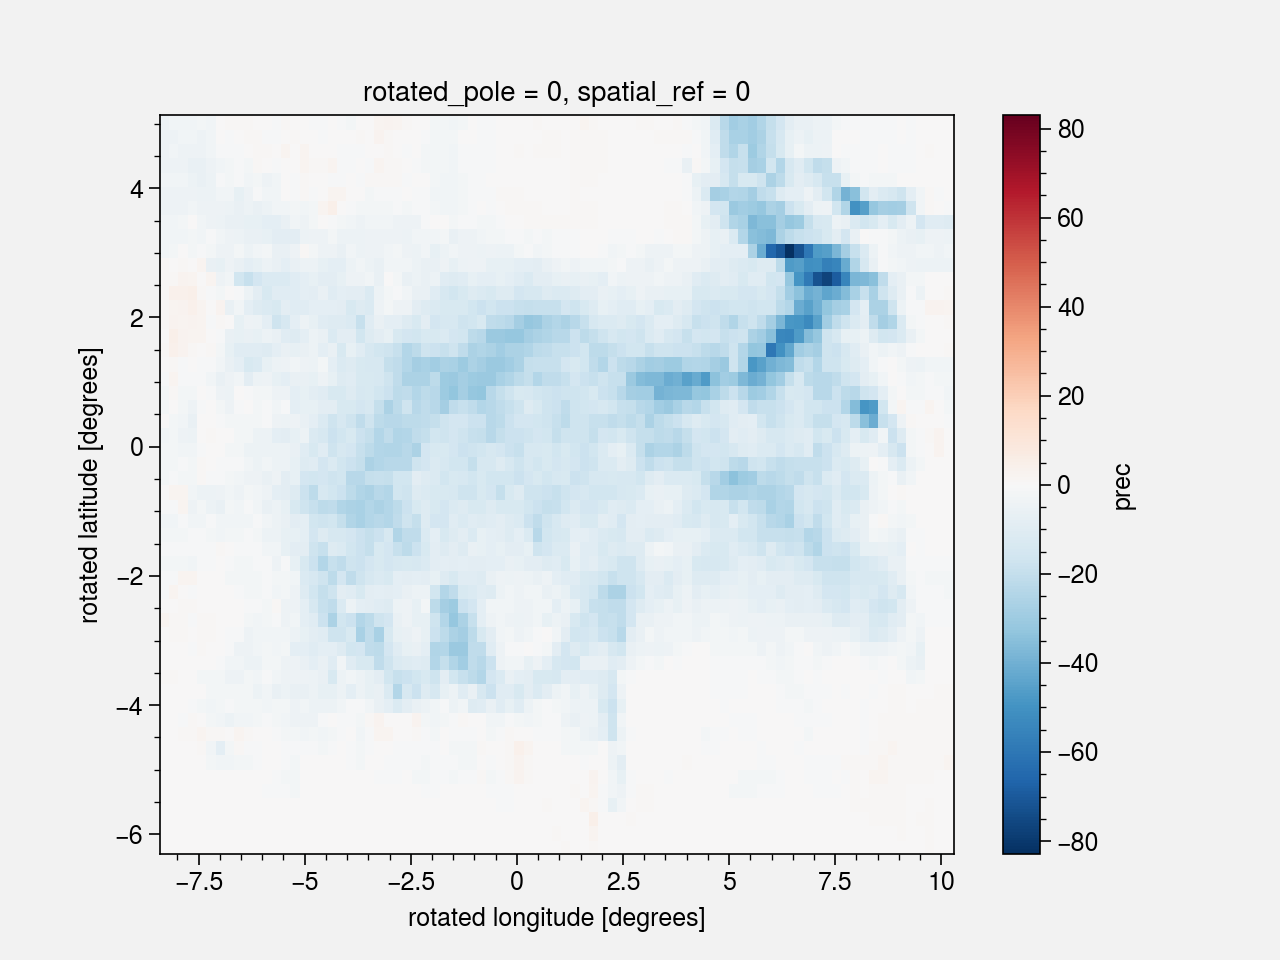

In [9]:
prec_threshold.plot()